## PROBLEM STATEMENT

In this assignment you will be working with a dummy advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. you will try to create a model that will predict whether or not they will click on an ad based on the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes

* 'Age': customer age in years

* 'Area Income': Avg. Income of geographical area of consumer

* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet

* 'Ad Topic Line': Headline of the advertisement

* 'City': City of consumer

* 'Male': Whether or not consumer was male

* 'Country': Country of consumer

* 'Timestamp': Time at which consumer clicked on Ad or closed window

* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

For the dataset (Advertising dataset), implement the ANN classifier using Keras in Python. [5M]

Dataset: Advertising Dataset.csv

The marks distribution are as follows:

Import the libraries and Load the dataset and Remove/replace missing values (if any) [1M]
Split features and labels [0.5M]
Split train and test data [0.5M]
Implement ANN Classifier using Keras [2M]
Calculate accuracy measures [1M]

## LIBRARIES IMPORT

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

## IMPORT DATASET


In [2]:
advertising_df = pd.read_csv('advertising-1.csv', encoding = 'ISO-8859-1')

### Data type and length of the variable

In [3]:
advertising_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


### Viewing first 5 data

In [4]:
advertising_df.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


### Descriptive statistics

In [5]:
advertising_df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Missing Value Check if any

In [6]:
advertising_df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [7]:
def show_unique_values(advertising_df):
    print("Unique value for dataset attributes :\n")
    for column in advertising_df.columns:
        print(column, "\n " ,advertising_df[column].unique(), "\n")  

In [8]:
show_unique_values(advertising_df)

Unique value for dataset attributes :

Daily Time Spent on Site 
  [68.95 80.23 69.47 74.15 68.37 59.99 88.91 66.   74.53 69.88 47.64 83.07
 69.57 79.52 42.95 63.45 55.39 82.03 54.7  74.58 77.22 84.59 41.49 87.29
 41.39 78.74 48.53 51.95 70.2  76.02 67.64 86.41 59.05 55.6  57.64 84.37
 62.26 65.82 50.43 38.93 84.98 64.24 82.52 81.38 80.47 37.68 69.62 85.4
 44.33 48.01 73.18 79.94 33.33 50.33 62.31 80.6  65.19 44.98 77.63 41.82
 85.61 85.84 72.08 86.06 45.96 62.42 63.89 35.33 75.74 78.53 46.13 69.01
 55.35 33.21 38.46 64.1  49.81 82.73 56.14 55.13 78.11 73.46 56.64 68.94
 70.79 57.76 77.51 52.7  57.7  56.89 69.9  55.79 70.03 50.08 43.67 72.84
 45.72 39.94 35.61 79.71 63.6  89.91 68.18 66.49 80.49 72.23 42.39 47.53
 74.02 66.63 63.24 71.   69.   76.99 72.6  61.88 84.45 88.97 86.19 49.58
 77.65 37.75 62.33 79.57 80.31 89.05 70.41 67.36 46.98 41.67 51.24 75.7
 43.49 49.89 38.37 38.52 71.89 75.8  83.86 37.51 83.67 69.08 37.47 56.04
 70.92 49.78 68.61 58.18 78.54 37.   65.4  87.98 44.64 41.7

There are no missing values

### Duplicate check

In [9]:
# displays duplicate records
advertising_df.duplicated().sum() 

0

There are no duplicate rows

### Numerical and Categorical Variables Identification

In [10]:
# displays column names
advertising_df.columns 

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [11]:
advertising_df.select_dtypes(include = ['object']).columns 

Index(['Ad Topic Line', 'City', 'Country', 'Timestamp'], dtype='object')

Displays categorical variables which are detected by python 

In [12]:
# Assigning columns as numerical variables
numeric_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage' ]

In [13]:
# Assigning columns as categorical variables
Categorical_cols = [ 'Ad Topic Line', 'City', 'Male', 'Country', 'Clicked on Ad' ]

### Summarizing Numerical Variables

In [14]:
# Decribe method is used to give statistical information on the numerical columns
advertising_df[numeric_cols].describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100
std,15.853615,8.785562,13414.634022,43.902339
min,32.600000,19.000000,13996.500000,104.780000
25%,51.360000,29.000000,47031.802500,138.830000
50%,68.215000,35.000000,57012.300000,183.130000
75%,78.547500,42.000000,65470.635000,218.792500
max,91.430000,61.000000,79484.800000,269.960000


As the mean and median(50% percentile) are very similar to each other which indicates that our data is not skewed and we do not require any data transformations.We shall confirm this by visualizing as well.

### Summarizing Categorical Variables

In [15]:
# Decribe method is used to give statistical information on the categorical columns
advertising_df[Categorical_cols].describe(include = ['O'])


,Ad Topic Line,City,Country
count,1000,1000,1000
unique,1000,969,237
top,Digitized interactive initiative,Lisamouth,France
freq,1,3,9


As we have many different cities (Unique) and also not many people belonging to a same city(freq). So, it probably means that this feature is having no or very less predictive power. However we have less diversity with country feature so we have to further investigate it

In [16]:
pd.crosstab(index=advertising_df['Country'],columns='count').sort_values(['count'], ascending=False)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
...,...
Montserrat,1
Mozambique,1
Romania,1


Based on the above data frame we can observe that maximum number of users are from France and Czech.

### Extracting Datetime Variables

Utilizing timestamp feature to better understand the pattern when a user is clicking on a ad

In [17]:
# Extract datetime variables using timestamp column
advertising_df['Timestamp'] = pd.to_datetime(advertising_df['Timestamp']) 
# Converting timestamp column into datatime object in order to extract new features
advertising_df['Month'] = advertising_df['Timestamp'].dt.month 
# Creates a new column called Month
advertising_df['Day'] = advertising_df['Timestamp'].dt.day     
# Creates a new column called Day
advertising_df['Hour'] = advertising_df['Timestamp'].dt.hour   
# Creates a new column called Hour
advertising_df["Weekday"] = advertising_df['Timestamp'].dt.dayofweek 
# Creates a new column called Weekday with sunday as 6 and monday as 0
# Other way to create a weekday column
#df['weekday'] = df['Timestamp'].apply(lambda x: x.weekday()) # Monday 0 .. sunday 6
# Dropping timestamp column to avoid redundancy
advertising_df = advertising_df.drop(['Timestamp'], axis=1) # deleting timestamp

In [18]:
advertising_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month,Day,Hour,Weekday
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,27,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,4,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,13,20,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,1,10,2,6
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,6,3,3,4


### Visualize Target Variable

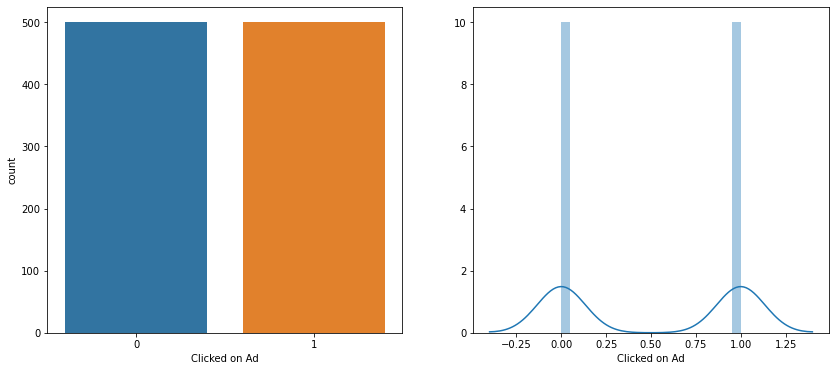

In [19]:
plt.figure(figsize = (14, 6)) 
plt.subplot(1,2,1)            
sns.countplot(x = 'Clicked on Ad', data = advertising_df)
plt.subplot(1,2,2)
sns.distplot(advertising_df["Clicked on Ad"], bins = 20)
plt.show()

So from the plot we can see that the number of users who click on a ad and who do not are equal in numbers i.e 500, that makes it very interesting.

### Visualize Data Set

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE03467B20>,
      dtype=object)

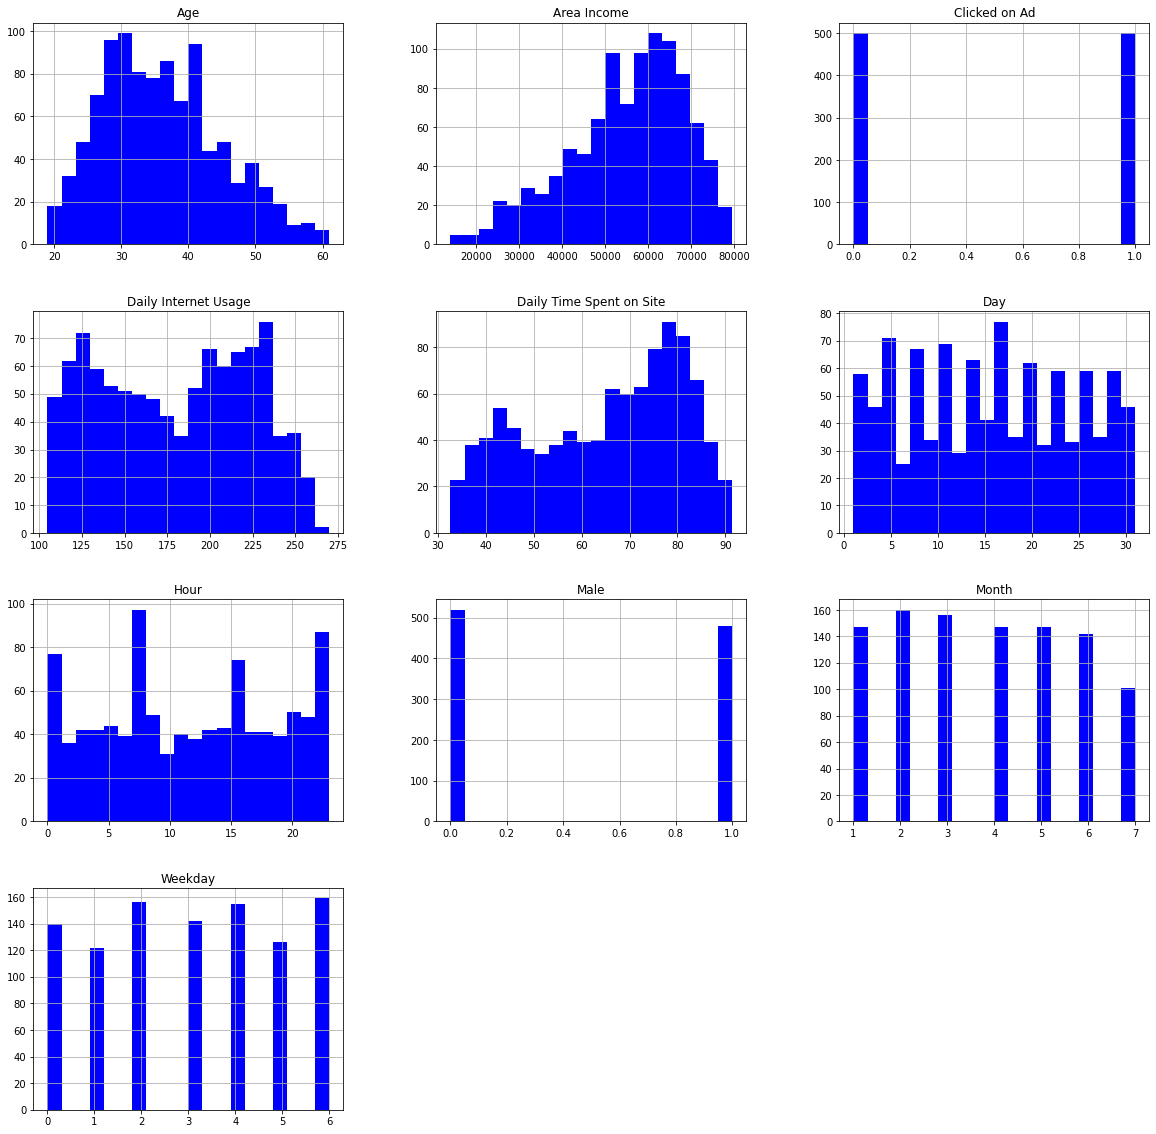

In [20]:
advertising_df.hist(bins = 20, figsize = (20,20), color = 'b')

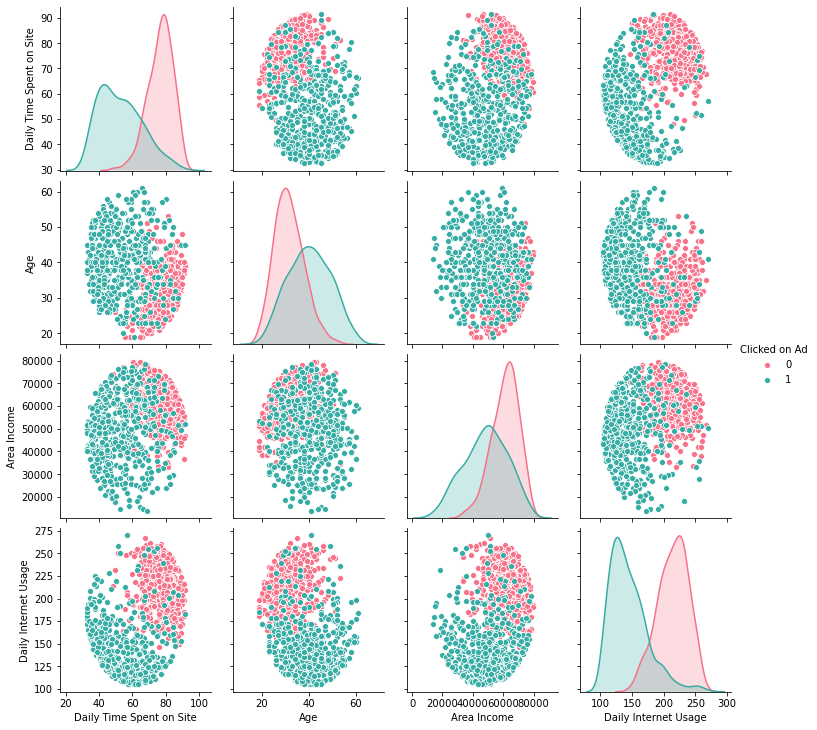

In [21]:
# Creating a pairplot with hue defined by Clicked on Ad column
sns.pairplot(advertising_df, hue = 'Clicked on Ad', vars = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'], palette = 'husl')

Pairplot represents the relationship between our target feature/variable and explanatory variables. It provides the possible direction of the relationship between the variables. We can see that people who spend less time on site and have less income and are aged more relatively are tend to click on ad.

### Correlation Between Variables

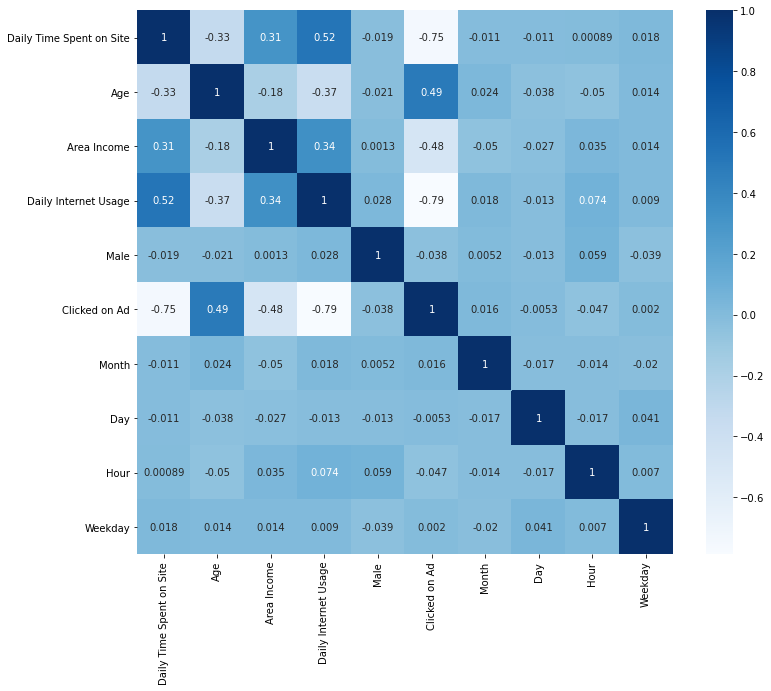

In [22]:
fig = plt.figure(figsize = (12,10))
sns.heatmap(advertising_df.corr(), cmap='Blues', annot = True) # Degree of relationship i.e correlation using heatmap

Heatmap gives us better understanding of relationship between each feature. Correlation is measured between -1 and 1. Higher the absolute value, higher is the degree of correlation between the variables. We expect daily internet usage and daily time spent on site to be more correlated with our target variable. Also, none of our explantory variables seems to correlate with each other which indicates there is no collinearity in our data.

In [23]:
advertising_df['Country Codes'] = advertising_df['Country'].astype('category').cat.codes
advertising_df['City Codes']= advertising_df['City'].astype('category').cat.codes
advertising_df[['City Codes','Country Codes']].head(5)

,City Codes,Country Codes
0,961,215
1,903,147
2,111,184
3,939,103
4,805,96


In [24]:
# Removing City,Country and 
advertising_df=advertising_df.drop(['City','Country','Ad Topic Line'],axis=1)

In [25]:
advertising_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day,Hour,Weekday,Country Codes,City Codes
0,68.95,35,61833.90,256.09,0,0,3,27,0,6,215,961
1,80.23,31,68441.85,193.77,1,0,4,4,1,0,147,903
2,69.47,26,59785.94,236.50,0,0,3,13,20,6,184,111
3,74.15,29,54806.18,245.89,1,0,1,10,2,6,103,939
4,68.37,35,73889.99,225.58,0,0,6,3,3,4,96,805


### Normilzation of the data

In [26]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names = advertising_df.columns
d = scaler.fit_transform(advertising_df)
scaled_advertising_df = pd.DataFrame(d, columns=names)
scaled_advertising_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day,Hour,Weekday,Country Codes,City Codes
0,0.617882,0.380952,0.730472,0.916031,0.0,0.0,0.333333,0.866667,0.000000,1.000000,0.911017,0.992769
1,0.809621,0.285714,0.831375,0.538746,1.0,0.0,0.500000,0.100000,0.043478,0.000000,0.622881,0.932851
2,0.626721,0.166667,0.699200,0.797433,0.0,0.0,0.333333,0.400000,0.869565,1.000000,0.779661,0.114669
3,0.706272,0.238095,0.623160,0.854280,1.0,0.0,0.000000,0.300000,0.086957,1.000000,0.436441,0.970041
4,0.608023,0.380952,0.914568,0.731323,0.0,0.0,0.833333,0.066667,0.130435,0.666667,0.406780,0.831612


### Training and Test data preparation

In [27]:
x=scaled_advertising_df.drop(['Clicked on Ad'],axis=1) #contain all  independent variable
y=scaled_advertising_df['Clicked on Ad'] #dependent variable

### Splitting Test and Train data

In [28]:
#dividing the dataset into training and testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(700, 11) (300, 11) (700,) (300,)


In [30]:
import tensorflow.keras
from keras.models import Sequential 
from keras.layers import Dense

model = Sequential()
model.add(Dense(100, input_dim = 7, activation = 'relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation = 'logistic'))

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
conda install tensorflow